In [35]:
#Importamos librerías
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge

# Regression

A continuación vamos a ver un ejemplo de como hacer uso del algoritmo de regresión de la librería scikit_learn. Vamos hacer uso del conjunto de datos gapminder, por lo que en primer lugar vamos a proceder a cargar los datos. Nuestro objetivo es predecir la esperanza de vida de un determinado país en función de una serie de características. PUesto que nuestra variable a predecir se trata de una cantidad cuantitativa en este caso estamos ante un problema de regresión. Para comenzar vamos a proceder a fijar nuestra regresión con una única variable: fertility, que nos indica el número medio de hijos que tienen las mujeres en un determinado país. Puesto que vamos a hacer uso de una única variable vamos a hacer uso del método reshape().

In [28]:
#Cargamos los datos
df = pd.read_csv('gm_2008_region.csv')
#Nos creamos las arrays y vemos sus dimensiones 
x = df['fertility'].values
y = df['life'].values
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(x.shape))
#Reescalamos nuestras variables y mostramos sus dimensiones
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(x.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


Podemos observar las diferencias entre las variables al ser muestreadas y tras no ser muestreadas. Es fundamental proporcionar al modelo los datos de la forma que pueda trabajar con estos de forma adecuada.

Como siempres es muy importante explorar nuestros datos mediante un análisis visual. Podriamos construir un mapa de calor de forma que nos permitiese ver de forma más clara la correlación entre las distintas variables de nuestro conjunto de datos.

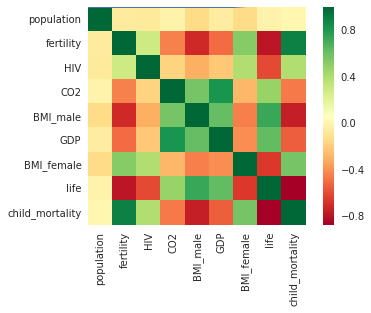

In [29]:
#Nos creamos nuestro mapa de calor
sns.set()
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

Este mapa de calor nos muestra como la esperanza de vidad (life) esta negativamente correlada con la mortalidad de los niños  y con la fertilidad. Por otro lado está correlada de forma postiva con CO2, BMI_male y GDP. Finalmente no existe correlación entre la población y la esperanza de vida.

A continuación vamos a proceder a aplicar la regresión lineal para una sola característica. En el caso de la regresión lineal la precisión con la cual medimos nuestro modelo es mediante la minimización del error cuadrático medio.

0.619244216774


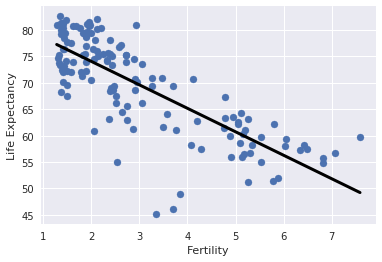

In [30]:
x_orig = df['fertility'].values
y_orig = df['life'].values
#Nos creamos el regresor 
reg = LinearRegression()
#Creamos el espacio de predicción
prediction_space = np.linspace(min(x_orig), max(x_orig)).reshape(-1, 1)
#Fijamos el modelo
reg.fit(x, y)
#Predecimos 
y_predict = reg.predict(prediction_space)
#Mostramos el accuracy
print(reg.score(x, y))
#Mostramos los resultados de forma gráfica
_ = plt.scatter(x_orig, y_orig)
_ = plt.plot(prediction_space, y_predict, color = 'black', linewidth = 3)
_ = plt.xlabel('Fertility')
_ = plt.ylabel('Life Expectancy')
plt.show()

Como ya vimos hacer la separación en train&test en nuestros datos es vital para que el modelo sea capaz de adaptarse a futuros cambios en los datos. A continuación vamos a proceder a separar nuestro conjunto de datos gapminder en train&test y tras esto vamos a proceder a aplicar nuestro regresión pero en este caso con todas las variables. Además de calcular el R^2, vamos a computar el error cuadrático medio (RMSE), que se trata de otra métrica bastante común a la hora de evaluar los modelos de regresión.

In [31]:
#Tomamos los datos en primer lugar
y = df['life'].values
x = df.drop(['life', 'Region'], axis = 1).values
#Separamos nuestro conjunto en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
#Nos creamos el regresor
reg = LinearRegression()
#Fijamos el regresor
reg.fit(x_train, y_train)
#Predecimos
y_pred = reg.predict(x_test)
#Calculamos las diferentes medidas de precisión
print("R^2: {}".format(reg.score(x_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.838046873142936
Root Mean Squared Error: 3.2476010800377213


Podemos ver como el uso de todas las variables ha mejorado nuestro modelo, esto tiene sentido ya que nuestro modelo dispone de más dalos de los cuales aprender. Sin embargo, corremos el riesgo de caer en overfitting, a continuación veremos la mejor forma de validar nuestro modelo.

# Cross Validation 

La validación cruzada o cross-validation es una técnica utilizada para evaluar los resultados de un análisis estadístico y garantizar que son independientes de la partición entre datos de entrenamiento y test. Consiste en calcular la media aritmética obtenida de las medidas de evaluación sobre diferentes particiones.

In [32]:
np.random.seed(42)
#Nos creamos nuestro regresor
reg = LinearRegression()
#Realizamos la validación cruzada y mostramos los resultados
cv_scores = cross_val_score(reg, x, y, cv = 5)
print(cv_scores)
#Calculamos la media de los resultados, debemos de recordar que por defecto la métrica usada por la regresión lineal
#es R^2.
print('Average 5-Fold CV Score: {}'.format(np.mean(cv_scores)))

[ 0.81720569  0.82917058  0.90214134  0.80633989  0.94495637]
Average 5-Fold CV Score: 0.8599627722793232


Realizar la validación cruzada es esencial, pero debemos de recordar que cuantos más fold usemos, computacionalmente todo será más costoso. Para comprobar esto vamos a proceder a realizar un 3-fold y un 10-fold, y veremos el tiempo que conlleva su cálculo. Para esto podemos hacer uso de %timeit

In [25]:
%timeit cross_val_score(reg, x, y, cv = 3)

3.44 ms ± 647 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
%timeit cross_val_score(reg, x, y, cv = 10)

9.72 ms ± 488 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Como podemos ver el tiempo es 5 veces mayor en el caso de 10 fold-validation.

# Regularized Regression

Cuando en una regresión estamos tratando un problema que tiene una gran cantidad de variables lo que implica tener que calcular una gran cantidad de parámetros es posible que finalmente caigamos en el problema del sobreajuste. Para minimizar este efecto en la minería de datos se hace uso de la regularización.
La regularización consiste en reducir la importancia de las parámetros  que aparecen en la función de coste. En el caso de la regresión lineal la función de coste se ve modificada por la adición de un sumatorio de todos los parámetros  con un factor llamado parámetro de regularización. El valor de este parámetro debe ser elegido de forma cuidadosa, ya que tantos valores elevados como reducidos dan lugar a distorsiones en la función de coste.

Otro de los puntos más importantes a la hora de crear nuestro conjunto es la selección de características. Es muy importante seleccionar aquellas variables que son útiles para crear nuestro modelo. En Python disponemos de la regresión de Lasso que nos devuelve determinados coeficientes con la importancia de cada una de las variables.

[-0.         -0.         -0.          0.          0.          0.         -0.
 -0.07087587]


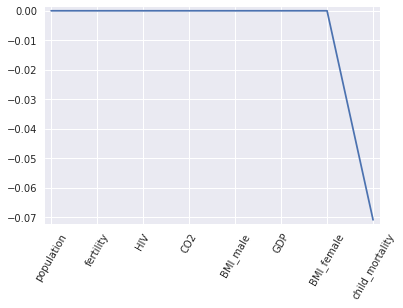

In [33]:
#Creamos el regresor de Lasso
lasso  = Lasso(alpha = 0.4, normalize = True)
#Fijamos el regresor
lasso.fit(x,y)
#Obtenemos los coeficientes
lasso_coef = lasso.coef_
print(lasso_coef)
#Mostramos los resultados de forma gráfica
df = df.drop(['life','Region'], axis = 1)
df_columns = df.columns
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()


Parece ser que la variable más importante de nuestro conjunto de datos a la hora de calcular la esperanza de vida es la variable child_mortality.

El regresor de laso es una buena opción para seleccionar características pero cuando estamos construyendo nuestro modelo de regresión, la regresión de Ridge debería de ser nuestra primera opción. Lasso realiza la regularización añadiendo a la funciónd de coste un término de penalización que es el valor absoluto de cada término multiplicado por la variable de regularización, este tipo de regularización es conocida como L1. Sin embargo esta no es la única forma de regularizar. En su lugar podemos tomar la suma de los cuadrados de los valores de los coeficientes multiplicados por el mismo coeficiente de regularización, esto se computa a partir del regresor ridge y es conocida como L2. A continuación vamos a proceder a representar gráficamente los resultados para cada alpha.

In [34]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

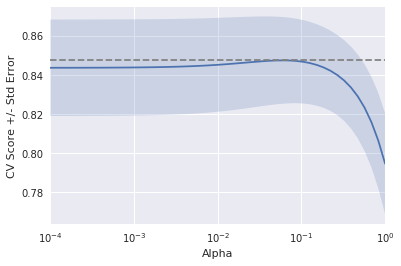

In [37]:
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Nos creamos nuestro regresor
ridge = Ridge(normalize=True)

# Calculamos el resultado para los distintos valores de alpha
for alpha in alpha_space:

    # Especificamos el valor de alpha
    ridge.alpha = alpha
    
    # Realizamos un 10-Fold
    ridge_cv_scores = cross_val_score(ridge, x, y, cv=10)
    
    # Añadimos a nuestra lista ridge_scores la media de los coeficientes para cada valor de alpha
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Añadimos a nuestra lista ridge_scores_std la desviación estándar de los coeficientes para cada valor de alpha
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Nos creamos el plot
display_plot(ridge_scores, ridge_scores_std)